In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み取る

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


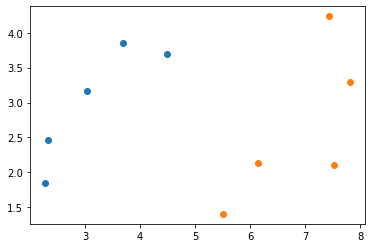

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("14-SupportVectorMachine.xlsx", usecols=[0, 1, 2], header=3)[:10].astype(np.float64)
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

## 学習させる
$output = Y \times ((B1 \times X1) + (B2 \times X2))$

- if $output < 1:$

$b = (1 - \frac{1}{t}) \times b + \frac{1}{lambda \times t} \times (y \times x)$

- else:

$b = (1 - \frac{1}{t}) \times b$

In [3]:
lmd = 0.45 # lambda
epoch = 16
b1 = b2 = 0.0
t = 0

In [4]:
accuracy_log = [] # for track of the accuracy.
for e in range(epoch):
    crisp = []
    for d in data.itertuples():
        t += 1
        crisp.append(-1 if (b1 * d.X1) + (b2 * d.X2) < 0 else 1)
        output = d.Y * ((b1 * d.X1) + (b2 * d.X2))
        if output < 1:
            b1 = (1 - 1 / t) * b1 + 1 / (lmd * t) * (d.Y * d.X1)
            b2 = (1 - 1 / t) * b2 + 1 / (lmd * t) * (d.Y * d.X2)
        else:
            b1 = (1 - 1 / t) * b1
            b2 = (1 - 1 / t) * b2
    accuracy = (crisp == data.Y).sum() / len(data)
    accuracy_log.append(accuracy*100)

## epoch毎の精度をtrackする

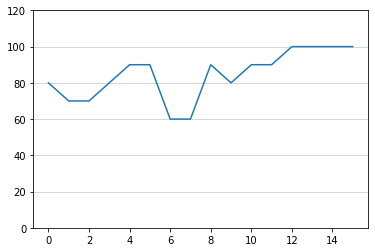

In [5]:
plt.ylim(0, 120)
plt.grid(axis='y', lw=0.5)
plt.plot(range(len(accuracy_log)), accuracy_log)

## 最終的な精度を確かめる
$output = (B1 \times X1) + (B2 \times X2)$

- if $output < 0$

$Y = -1$

- else 

$Y = 1$

In [6]:
crisp = np.where((b1 * data.X1) + (b2 * data.X2) < 0, -1, 1)
print(crisp)
accuracy = (crisp == data.Y).sum() / len(data)
print(str(accuracy * 100) + '%')

[-1 -1 -1 -1 -1  1  1  1  1  1]
100.0%


## hyperplaneを可視化する
hyperplane: 
$0 + (b1 \times X1) + (b2 \times X2) = 0 \\
X2 = -\frac{b1 \times X1}{b2}$

epoch数を増やすとhyperplaneが丁度良い感じに移動する. 

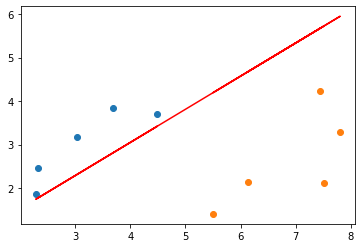

In [7]:
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

x = data.X1
y = b1 * data.X1 / -b2
plt.plot(x, y, color='red')